In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da
import os
import sys
import logging


logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(src_path)
sys.path.append(src_path)

from src.Analysis import Analysis, AnalysisManager, GR_Confirmation, SpotDetection_Confirmation

c:\Users\Jack\Documents\GitHub\AngelFISH


Loads in the data from specified location

In [2]:
loc = None # r"Y:\smFISH_images\Eric_smFISH_images\20230511\GR_ICC_3hr_R1_1nM_0min_050823\GR_ICC_3hr_R1_1nM_0min_050823.h5"
log_location = r'Y:\Users\Jack\All_Analysis'
am = AnalysisManager(location=loc, log_location=log_location) # change this to your mounted drive location for this folder
# This analysis is best done with the NAS mounted 

In [3]:
# list all analysis done 
am.list_analysis_names()

Analysis_ER_Dec0324_2024-12-19
Analysis_ER_Dec0324_DUSP1_2024-12-19
Analysis_ER_Dec0324_GR_2024-12-20
Analysis_ER_Dec1924_wCyto_2024-12-19


['Analysis_ER_Dec0324_2024-12-19',
 'Analysis_ER_Dec0324_DUSP1_2024-12-19',
 'Analysis_ER_Dec0324_GR_2024-12-20',
 'Analysis_ER_Dec1924_wCyto_2024-12-19']

In [4]:
# can filter on name and dates
am.select_analysis('ER_Dec0324_GR')
print(am.analysis)

[<HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 me

Does analysis/confirmation

In [5]:
# select GR conformation analysis 
GR = GR_Confirmation(am)

In [6]:
# this loads the data into memory 
GR.get_data()

In [7]:
# This is a temporary fix, I didnt do this in the correct spot in the first run
# this will be fixed in future runs
for h5 in np.unique(GR.cellprops['h5_idx']):
    GR.cellprops.loc[GR.cellprops['h5_idx'] == h5, 'fov'] = pd.Categorical(GR.cellprops.loc[GR.cellprops['h5_idx'] == h5, 'fov']).codes


In [8]:
# make sure this has all the measurements you want
GR.cellprops.keys()

Index(['nuc_label', 'nuc_bbox-0', 'nuc_bbox-1', 'nuc_bbox-2', 'nuc_bbox-3',
       'nuc_area', 'nuc_centroid-0', 'nuc_centroid-1', 'nuc_intensity_max-0',
       'nuc_intensity_max-1', 'nuc_intensity_mean-0', 'nuc_intensity_mean-1',
       'nuc_intensity_min-0', 'nuc_intensity_min-1', 'nuc_intensity_std-0',
       'nuc_intensity_std-1', 'nuc_touching_border', 'cell_label',
       'cell_bbox-0', 'cell_bbox-1', 'cell_bbox-2', 'cell_bbox-3', 'cell_area',
       'cell_centroid-0', 'cell_centroid-1', 'cell_intensity_max-0',
       'cell_intensity_max-1', 'cell_intensity_mean-0',
       'cell_intensity_mean-1', 'cell_intensity_min-0', 'cell_intensity_min-1',
       'cell_intensity_std-0', 'cell_intensity_std-1', 'cell_touching_border',
       'cyto_label', 'cyto_bbox-0', 'cyto_bbox-1', 'cyto_bbox-2',
       'cyto_bbox-3', 'cyto_area', 'cyto_centroid-0', 'cyto_centroid-1',
       'cyto_intensity_max-0', 'cyto_intensity_max-1', 'cyto_intensity_mean-0',
       'cyto_intensity_mean-1', 'cyto_inte

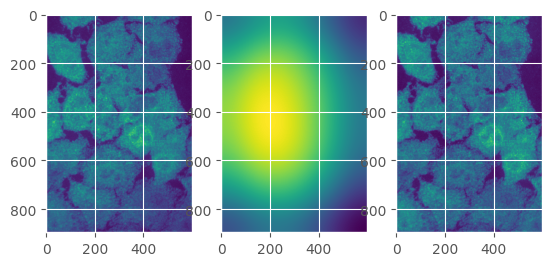

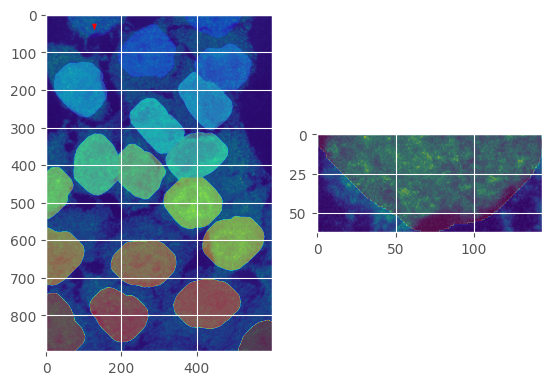

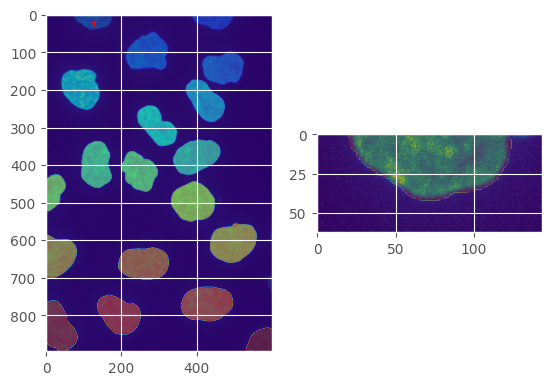

In [ ]:
# run this multiple times to see a new randomly selected cell
GR.display()

In [ ]:
GR.cellprops

In [11]:
keys_to_plot = ['area', 'intensity_mean']
channel_maps = {'-1': 'nuc', '-0': 'GR'}
for k in GR.cellprops.keys():
    if keys_to_plot in keys_to_plot:
        # Plot histogram for 'area'
        plt.figure(figsize=(10, 5))
        plt.hist(GR.cellprops[k], bins=30, alpha=0.5, label='Area')
        plt.ylabel('Frequency')
        for suffix, channel in channel_maps.items():
            if k.endswith(suffix):
                k = k.replace(suffix, channel)
                break
        plt.title(f'Histogram of {k}')
        plt.legend()
        plt.show()

In [ ]:
# save_loc = r'some/local/location' 
# GR.save_data(save_loc) # This will save all the GR Data into one csv

In [12]:
GR.close()